In [2]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd

In [2]:
root_path = ['lstm_short','transformer_short','my_former_short']

In [56]:
# 论文形式
def subplot_figure(result_dict,data_loader, scaler_model, features_size,index = -1, save=None):
    x, _, y, x_mask, _, y_mask = data_loader[-2:-1]
    x_origin = scaler_model.inverse_transform(x.reshape(-1, features_size))[:]  # 前96个值
    y_origin = scaler_model.inverse_transform(y.reshape(-1, features_size))[:]  # 真实的后336个值
    x_origin = np.vstack([x_origin, y_origin[0]])
    # 上面全部变成了ndarray，因此可以一个一个看
    features = ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT']
    f = plt.figure(figsize=(12, 3))
    for subplot_index, (key, value) in enumerate(result_dict.items()):
        plt.subplot(1, 3, subplot_index + 1)
        plt.plot([i for i in range(0, len(x_origin))], x_origin[:, index], '#21266e', linewidth=0.9,
                 label="Ground Truth")
        plt.plot([i for i in range(len(x_origin) - 1, len(x_origin) + len(y_origin) - 1)], y_origin[:, index],
                 '#21266e', linewidth=0.9)
        plt.plot([i for i in range(len(x_origin) - 1, len(x_origin) + len(y_origin) - 1)], value[:, index],
                 "#d70005", linewidth=0.9, label="prediction")
        plt.title(f"{key} model", fontproperties="Times New Roman", fontsize=12)
        plt.ylabel('values', fontproperties="Times New Roman", fontsize=10)  # y轴标题
        plt.xlabel('times', fontproperties="Times New Roman", fontsize=10)  # y轴标题
        plt.yticks(fontproperties="Times New Roman", c='black')
        plt.xticks(fontproperties="Times New Roman", c='black')
        plt.legend(loc=3, prop={'family': 'Times New Roman', 'size': 8})
    plt.subplots_adjust(wspace=0.2, hspace=0.46)
    plt.suptitle(f"Comparison chart of {features[index]} variable of three models", fontproperties="Times New Roman", fontsize=16,y=1.05)
    plt.show()
    if save is not None:
        f.savefig(f'../output/long_compare/three_model_long_compare_{features[index]}.svg', dpi=3000, bbox_inches='tight')

In [12]:
from sklearn.preprocessing import  MinMaxScaler
from CLASS.data_class_time_features import data_utils

In [52]:
scaler_model = MinMaxScaler()
dataset_train, dataset_valid, dataset_test = data_utils().data_process('../dataset', 96,
                                                                       336, 1, scaler_model)

In [53]:
# short
lstm_short = pd.read_csv('../output/lstm_long/y_predict.csv')
transformer_short = pd.read_csv('../output/transformer_long/y_predict.csv')
my_former_short = pd.read_csv('../output/my_former_long/y_predict.csv')


In [54]:
result_dict = {
    'lstm_long':lstm_short.to_numpy(),
    'transformer_long':transformer_short.to_numpy(),
    'my_former_long':my_former_short.to_numpy()

}

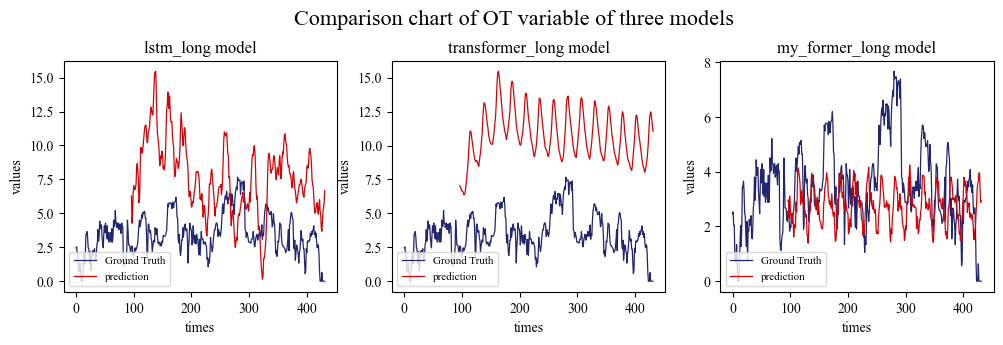

In [57]:
subplot_figure(result_dict,dataset_test,scaler_model,7,index=-1,save=1)

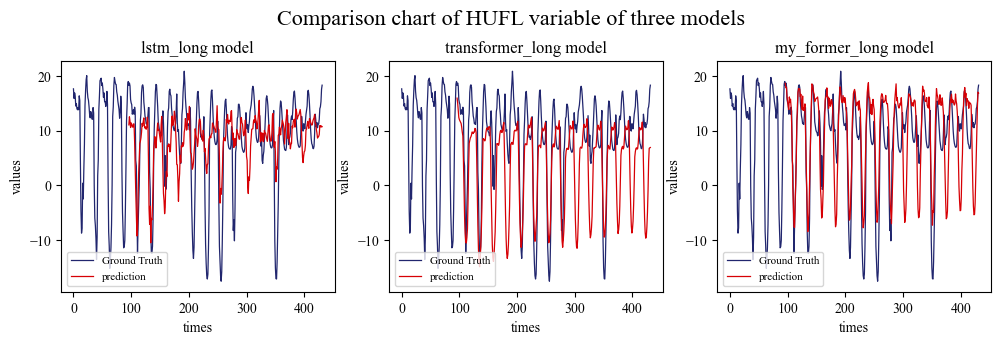

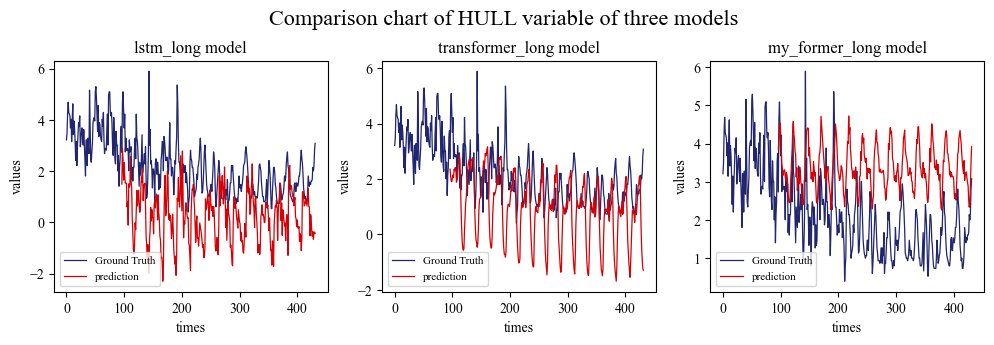

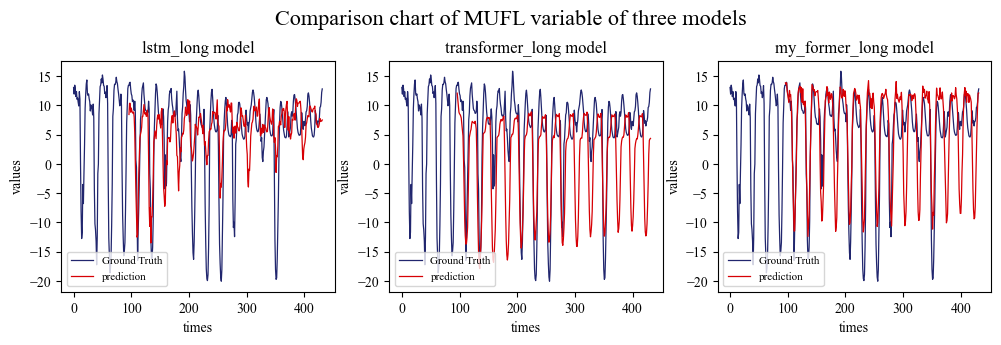

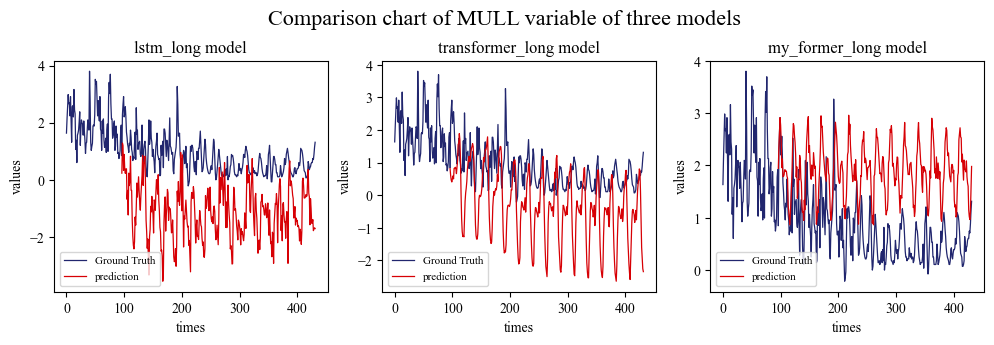

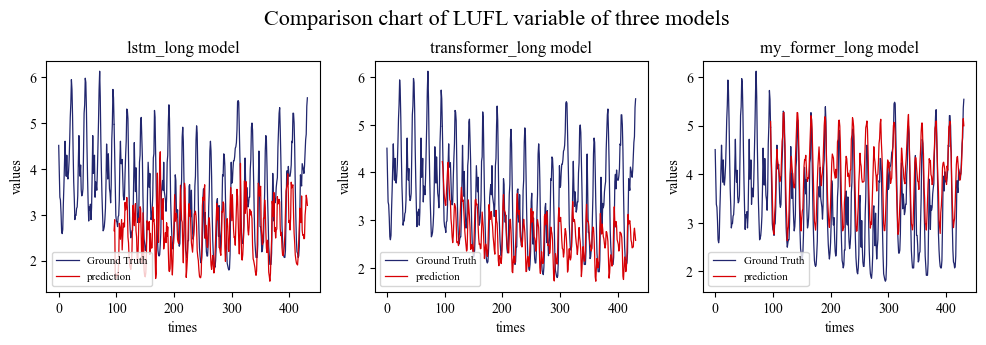

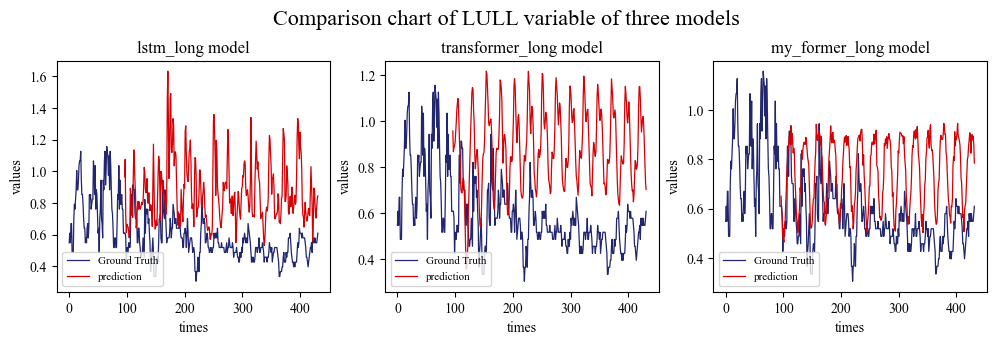

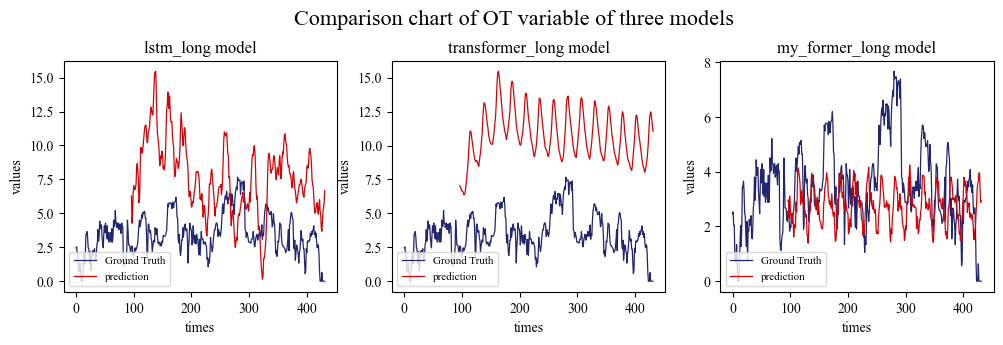

In [58]:
for i in range(7):
    subplot_figure(result_dict,dataset_test,scaler_model,7,index=i,save=1)

In [35]:
# 短时间的画图
def Train_and_Valid_MAEloss_shot(result_dict,name):
    # epoch
    f = plt.figure(figsize=(12, 3))
    for subplot_index, (key, value) in enumerate(result_dict.items()):
        plt.subplot(1, 3, subplot_index + 1)
        train_data = value['train']
        valid_data = value['valid']
        train_data.columns = ['epoch','loss']
        valid_data.columns = ['epoch','loss']
        train_loss_epoch = train_data.groupby(by='epoch').sum()
        valid_loss_epoch = valid_data.groupby(by='epoch').sum()
        train_loss_epoch = list(train_loss_epoch['loss'])
        valid_loss_epoch = list(valid_loss_epoch['loss'])

        plt.plot(train_loss_epoch,'#d70005',label="train_loss",linewidth=1.5)
        plt.plot(valid_loss_epoch,'#21266e',label="valid_loss",marker='o',linewidth=0.8,markersize=3)
        plt.xlabel(f'epoch_nums',fontsize=14,c='black',fontproperties="Times New Roman")
        plt.ylabel('MSE Loss',fontsize=14,c='black',fontproperties="Times New Roman")
        plt.fill_between([i for i in range(len(train_loss_epoch))], train_loss_epoch, color="#d70005", alpha=0.1)
        plt.yticks(fontsize=14,fontproperties="Times New Roman",c='black')
        plt.xticks(fontsize=14,fontproperties="Times New Roman",c='black')
        plt.margins(x=0)
        plt.margins(y=0)
        plt.ylim(0,2)
        plt.legend(loc=1,prop={'family':'Times New Roman','size':14})
        TK = plt.gca()#获取边框
        TK.spines['bottom'].set_color("#000000")#图框下边
        TK.spines['left'].set_color("#000000")#图框左边
        TK.spines['top'].set_color("#000000")#图框上边
        TK.spines['right'].set_color("#000000")#图框右边
        plt.title(f"{key} model", fontproperties="Times New Roman", fontsize=15)

    plt.subplots_adjust(wspace=0.3, hspace=0.46)
    plt.suptitle(f"Train and Valid MSE loss of three models in {name}-range prediction", fontproperties="Times New Roman", fontsize=16,y=1.05)
    plt.show()
    f.savefig(f'../output/{name}_compare/Train_and_Valid_MAEloss.svg',dpi=3000,bbox_inches='tight')

In [36]:
conv_ilstm_train_data = pd.read_csv('../output/conv_ilstm_long/train_loss_list.csv',header=None)
conv_ilstm_valid_data = pd.read_csv('../output/conv_ilstm_long/valid_loss_list.csv',header=None)

transformer_train_data = pd.read_csv('../output/transformer_long/train_loss_list.csv',header=None)
transformer_valid_data = pd.read_csv('../output/transformer_long/valid_loss_list.csv',header=None)

lstm_train_data = pd.read_csv('../output/lstm_long/train_loss_list.csv',header=None)
lstm_valid_data = pd.read_csv('../output/lstm_long/valid_loss_list.csv',header=None)

In [37]:
result_dict = {
    'lstm':{
        'train':lstm_train_data,
        'valid':lstm_valid_data
    },
    'transformer':{
        'train':transformer_train_data,
        'valid':transformer_valid_data,
    },
    'conv_ilstm':{
        'train':conv_ilstm_train_data,
        'valid':conv_ilstm_valid_data,
    },
}

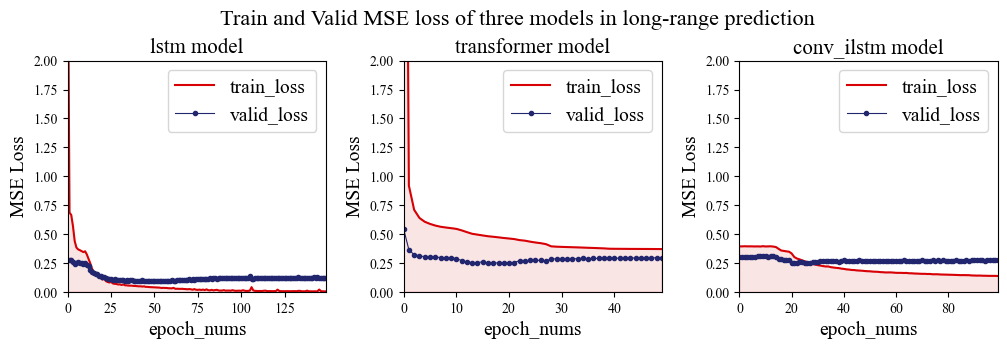

In [38]:
Train_and_Valid_MAEloss_shot(result_dict,'long')

In [39]:
conv_ilstm_train_data = pd.read_csv('../output/conv_ilstm_short/train_loss_list.csv',header=None)
conv_ilstm_valid_data = pd.read_csv('../output/conv_ilstm_short/valid_loss_list.csv',header=None)

transformer_train_data = pd.read_csv('../output/transformer_short/train_loss_list.csv',header=None)
transformer_valid_data = pd.read_csv('../output/transformer_short/valid_loss_list.csv',header=None)

lstm_train_data = pd.read_csv('../output/lstm_short/train_loss_list.csv',header=None)
lstm_valid_data = pd.read_csv('../output/lstm_short/valid_loss_list.csv',header=None)

In [40]:
result_dict = {
    'lstm':{
        'train':lstm_train_data,
        'valid':lstm_valid_data
    },
    'transformer':{
        'train':transformer_train_data,
        'valid':transformer_valid_data,
    },
    'conv_ilstm':{
        'train':conv_ilstm_train_data,
        'valid':conv_ilstm_valid_data,
    },
}

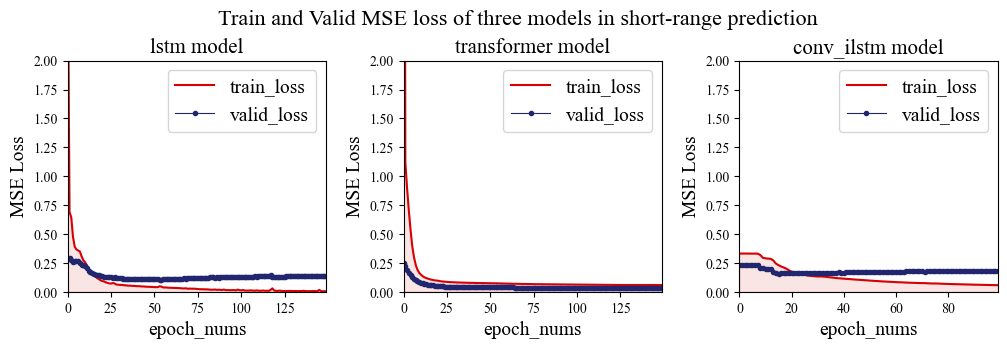

In [41]:
Train_and_Valid_MAEloss_shot(result_dict,'short')

In [17]:
def Test_MSE_and_MAE_Loss(result_dict,name):

    f = plt.figure(figsize=(12, 3))
    for subplot_index, (key, value) in enumerate(result_dict.items()):
        test_mae = value['mae']
        test_mse = value['mse']
        # 做图
        ax1 = plt.subplot(1, 3, subplot_index + 1)
        lns1=ax1.plot(test_mae,'#d70005',label="MAE_Loss",marker='o',linewidth=0.8,markersize=1)
        ax1.set_ylabel('MAE Loss',fontsize=10,c='black',fontproperties="Times New Roman")
        plt.yticks(fontsize=10,fontproperties="Times New Roman",c='black')
        plt.xticks(fontsize=10,fontproperties="Times New Roman",c='black')

        ax1.set_ylim([min(test_mae)*0.97, max(test_mae)*1.03])


        ax1.margins(x=0)
        ax1.margins(y=0)
        ax2 = ax1.twinx()  # this is the important function
        ax2.margins(x=0)
        ax2.margins(y=0)

        lns2=ax2.plot(test_mse,'#21266e',label="MSE_Loss",marker='o',linewidth=0.8,markersize=1)
        ax2.set_xlabel(f'batch_nums',fontsize=10,c='black',fontproperties="Times New Roman")
        ax2.set_ylabel('MSE_Loss',fontsize=10,c='black',fontproperties="Times New Roman")
        plt.xticks(fontsize=10,fontproperties="Times New Roman",c='black')
        plt.yticks(fontsize=10,fontproperties="Times New Roman",c='black')
        ax2.set_ylim([min(test_mse)*0.97, max(test_mse)*1.03])
        lns = lns1+lns2
        labs = [l.get_label() for l in lns]
        ax2.legend(lns, labs, loc=2,prop={'family':'Times New Roman','size':10})
        plt.title(f"{key} model",fontproperties="Times New Roman",fontsize=15)
        TK = plt.gca()#获取边框
        TK.spines['bottom'].set_color("#000000")#图框下边
        TK.spines['left'].set_color("#000000")#图框左边
        TK.spines['top'].set_color("#000000")#图框上边
        TK.spines['right'].set_color("#000000")#图框右边
        # 设置 x 轴上的标签格式


    plt.subplots_adjust(wspace=0.63, hspace=0.46)
    plt.suptitle(f"Test MSE and MAE loss of three models in {name}-range prediction", fontproperties="Times New Roman", fontsize=16,y=1.05)
    plt.show()
    f.savefig(f'../output/{name}_compare/Test_MSE_and_MAE_Loss.svg',dpi=3000,bbox_inches='tight')

In [18]:
conv_ilstmtest_mse = list(pd.read_csv('../output/conv_ilstm_short/mse_loss_list.csv',header=None)[0])
conv_ilstmtest_mae = list(pd.read_csv('../output/conv_ilstm_short/mae_loss_list.csv',header=None)[0])

lstmtest_mse = list(pd.read_csv('../output/lstm_short/mse_loss_list.csv',header=None)[0])
lstmtest_mae = list(pd.read_csv('../output/lstm_short/mae_loss_list.csv',header=None)[0])

transformertest_mse = list(pd.read_csv('../output/transformer_short/mse_loss_list.csv',header=None)[0])
transformertest_mae = list(pd.read_csv('../output/transformer_short/mae_loss_list.csv',header=None)[0])

In [19]:
result_dict = {
    'lstm': {
        'mse': lstmtest_mse,
        'mae': lstmtest_mae
    },
    'transformer': {
        'mse': transformertest_mse,
        'mae': transformertest_mae,
    },
    'conv_ilstm': {
        'mse': conv_ilstmtest_mse,
        'mae': conv_ilstmtest_mae,
    },
}

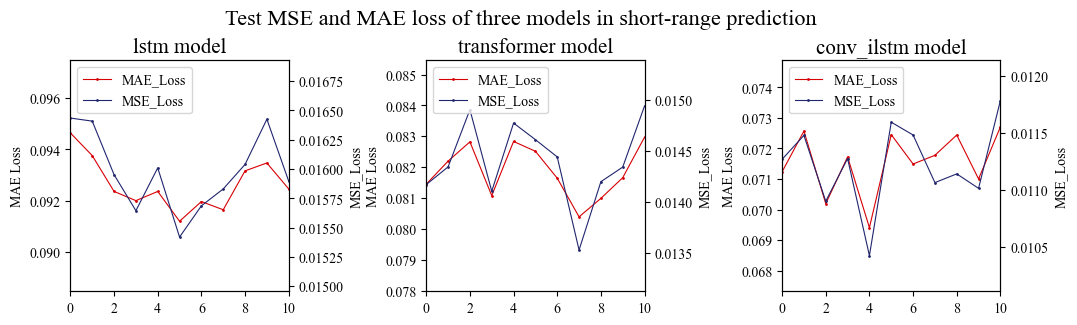

In [20]:
Test_MSE_and_MAE_Loss(result_dict,'short')

In [21]:
conv_ilstmtest_mse = list(pd.read_csv('../output/conv_ilstm_long/mse_loss_list.csv',header=None)[0])
conv_ilstmtest_mae = list(pd.read_csv('../output/conv_ilstm_long/mae_loss_list.csv',header=None)[0])

lstmtest_mse = list(pd.read_csv('../output/lstm_long/mse_loss_list.csv',header=None)[0])
lstmtest_mae = list(pd.read_csv('../output/lstm_long/mae_loss_list.csv',header=None)[0])

transformertest_mse = list(pd.read_csv('../output/transformer_long/mse_loss_list.csv',header=None)[0])
transformertest_mae = list(pd.read_csv('../output/transformer_long/mae_loss_list.csv',header=None)[0])

In [24]:
result_dict = {
    'lstm': {
        'mse': lstmtest_mse,
        'mae': lstmtest_mae
    },
    'transformer': {
        'mse': transformertest_mse,
        'mae': transformertest_mae,
    },
    'conv_ilstm': {
        'mse': conv_ilstmtest_mse,
        'mae': conv_ilstmtest_mae,
    },
}

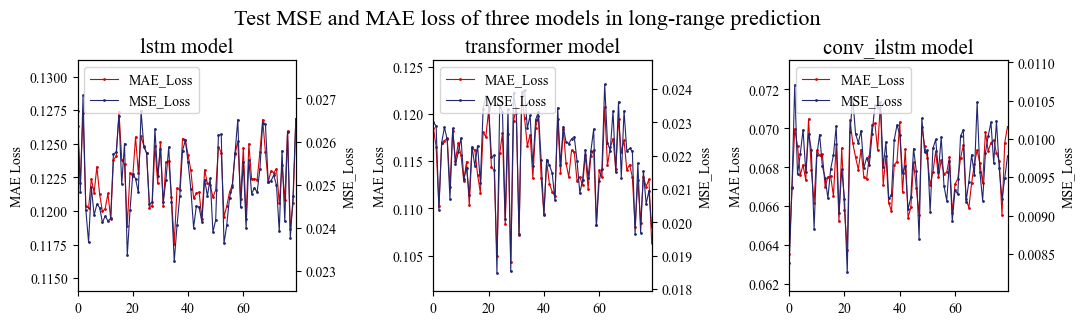

In [25]:
Test_MSE_and_MAE_Loss(result_dict,'long')